<a href="https://colab.research.google.com/github/Fedryus/Ejercicios-IA/blob/master/HelloBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles #GameOfThronesClasifyProblem

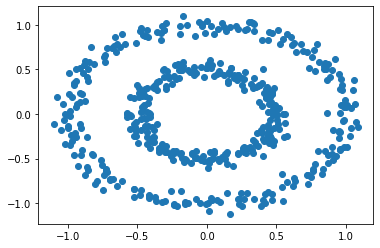

In [100]:
# CREAR EL DATASET

n=500 #nro de registros que tenemos (cant datos)
p=2 #nro de caracteristicas de estos registros (mas facil bidimensional)

X, Y= make_circles(n_samples=n, factor=0.5,noise=0.05)
#factor= distancia entre los circulos
#noise= para que queden nubes de puntos y no circulos perfectos

Y= Y[:, np.newaxis]
plt.scatter(X[:,0],X[:,1])
plt.show()

In [0]:
#Las neuronas dentro de una capa N realizan la misma operacion
#Ergo, puedo pensar a la red como un conjunto de modulos(capas)

In [0]:
#Creo una clase capa para crear capas(una estructura de datos)
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f= act_f
#los parametros de la capa son el bias y W
    self.b = np.random.rand(1, n_neur) *2 -1 #normalizamos y estandarizamos 
    self.W = np.random.rand(n_conn, n_neur) *2-1

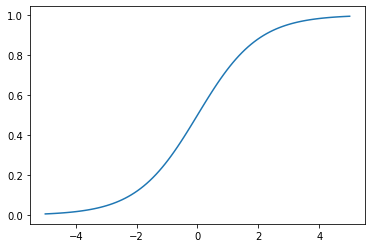

In [103]:
# FUNCIONES DE ACTIVACION
sigm = (lambda x: 1/(1+ np.e ** (-x)),
        lambda x:x*(1-x))

relu= lambda x: np.maximum(0,x)

_x= np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

#No es necesario que todas las capas tengan la misma act_f

In [0]:
# CAPA 0 y 1
l0= neural_layer(p,4,sigm)
l1= nerual_layer(4,8,sigm)


#Mejor creamos una funcion
def create_nn(topology, act_f):

  nn= [] 
  for l, layer in enumerate(topology[:-1]): ##el -1 es para que itere HASTA el ultimo elemento y no se pase con el l+1

    nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
  return nn


In [0]:
#Con esto ya esta la estructura, pero no sirve para nada, falta la logica

In [0]:
topology= [p, 4, 8, 1] #cantidad de neuronas por capa
#sacando p y 1 el resto de nro_neur fue elegido al azar
neural_net= create_nn(topology,sigm)

In [0]:
#ENTRENAMIENTO - 3 pasos
#1)Propagacion hacia adelante: Le muestro un dato de entrada y uno de salida.
  #procesara por capas y ejecutara sumas ponderas y funciones hasta escupir un valor.
  #como no está entrenada el primer resultado será aleatorio
#2)Una vez tengo el resultado lo compara con el resultado real y uso la f. de coste
  #esto me va a generar un error que lo usaremos en BACKPROPAGATION para hallar derivadas parciales
#3)Con ellas puedo usar el Descenso del gradiente para optimizar la f. de coste
  #y asi entrenar a la red.


In [0]:
# FUNCION DE COSTE

#Error cuadratico medio
l2_cost= (lambda Ypred, Yreal: np.mean((Ypred- Yreal)**2),
          lambda Yp,Yr:(Yp-Yr)) #esta 2da es la derivada del ECM. Backprop lo necesita luego


In [0]:
#def train(nn, datosEntrada, datoSalida,f.coste,lr para el desc. del grad)
def train(neural_net, X, Y, l2_cost, lr=0.5,train=True):

  out= [(None, X)] #vector para ir guardando los outputs de c/capa
  #en vez de guardar el resultado final(el que pasa por la act_f)
  #decido guardar pares ordenados (sumaPonderadaDeLaCapaN,valorActivacionDeLaCapaN)
  #out= [(z0,a0),(z1,a1),...]
  #out inicia en None (la suma ponderada no existe) y X (los datos) para el primer caso de la iteracion

  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W +neural_net[l].b
    #con esta linea implementamos la suma ponderada
    a= neural_net[l].act_f[0](z)
  #con esta linea paso la suma por la f. de activacion
  #acordarse que la sigmoide la declaramos como 2 funciones, por eso act_f[0]

    out.append((z,a))
  




  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
       
      _W = neural_net[l].W
 
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]


In [0]:

#train(neural_net, X, Y, l2_cost, lr=0.5)

In [0]:
#Dato del BackPropagation: las derivadas parciales son las de W y b respecto al coste

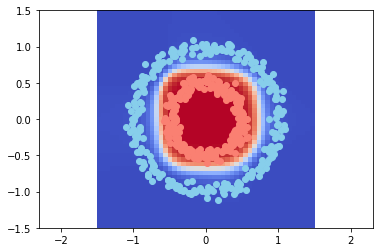

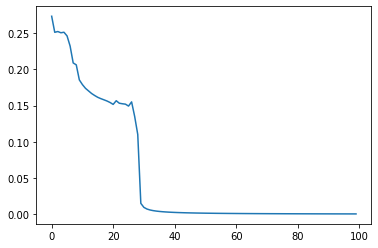

In [111]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  